In [1]:
import pandas as pd

In [3]:
police = pd.read_csv('data/police.csv')

In [12]:
# group all drivers by gender and get the counts for each value
# in the 'violation' column (i.e. speeding, other, etc.)        
driver_gender_violation = police.groupby('driver_gender').violation.value_counts()


In [13]:
#show the result of the groupby operation
driver_gender_violation

driver_gender  violation          
F              Speeding               15646
               Moving violation        3286
               Equipment               2501
               Registration/plates     1056
               Other                    707
               Seat belt                578
M              Speeding               32777
               Moving violation       12938
               Equipment               8420
               Other                   3702
               Registration/plates     2647
               Seat belt               2278
Name: violation, dtype: int64

<AxesSubplot:xlabel='driver_gender,violation'>

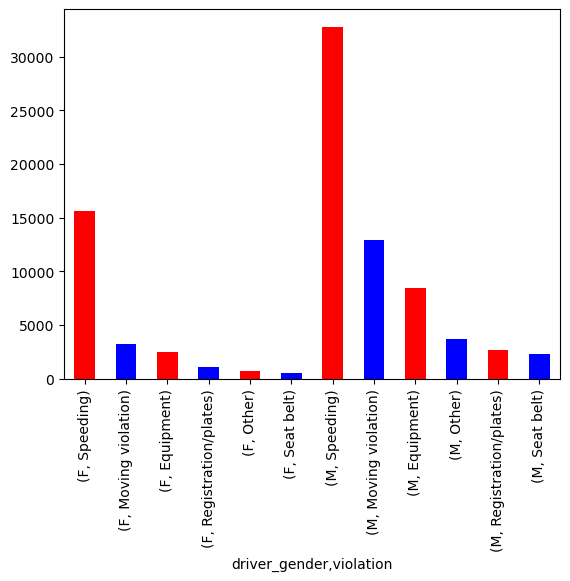

In [16]:

# plot the result of the groupby operation as a bar chart
# with different colors for M and F
driver_gender_violation.plot(
    kind='bar', color=['red', 'blue'])

